<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-06-06 11:48:54
-------------------
qualified stocks: 93
with latest results: 31
still star stocks: 17
-------------------
Initial Investment:  1.17 C
CY Investment:  1.44 C
Reserve:  1.64 L
Current:  1.33 C
-------------------
Today PnL: 84.52 K (0.64%)
Current PnL: -15.53 L (-10.82%)
CY Booked + Current PnL: -10.53 L (-7.34%)
-------------------
Total profit:  4.61 L
Total loss:  -20.14 L
-------------------
Total Booked + Current PnL: 16.45 L (14.11%)
Total Booked PnL: 31.97 L (27.43%)
Curr Year Booked PnL: 4.99 L (3.75%)
Prev Year Booked PnL: 26.98 L (23.15%)
Est FTT:  2.12 C
Est FTT PnL: 78.41 L (58.91%)
-------------------
Est LTT:  2.74 C
Est LTT PnL: 1.41 C (105.65%)
Deployed:  1.17 C
Current:  1.33 C
CAGR/XIRR %: 9.45%


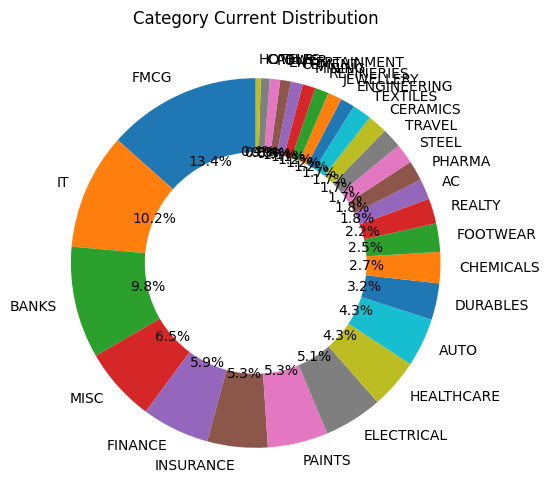

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSI_14', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Strategy','Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
26,DLF,714.31,885.00,-12.51,H-LC,82.0,92.47,290502.0,54065.0,2440.0,...,0.84,23.90,NaN,34.0,22.16,2.21,44.34,AR,NTT,REALTY
50,LICI,785.05,983.00,-13.37,H-LC,78.0,90.32,237460.0,42768.0,6316.0,...,2.66,25.21,202.0,31.0,6.77,1.81,31.31,XY25,NTT,INSURANCE
4,ADANIPORTS,1103.69,1583.00,3.92,M-LC,70.0,61.29,104370.0,26008.0,8026.0,...,7.69,43.43,NaN,71.0,3.24,0.79,39.59,XY24,NTT,MISC
62,RELIANCE,1291.83,1526.00,6.13,X-LC,63.0,30.11,157952.0,17143.0,8387.0,...,5.31,18.13,67.0,20.0,2.04,1.20,24.72,XY25,NTT,REFINERIES
85,UNIONBANK,123.87,163.00,0.00,M-LC,74.0,93.55,175143.0,34303.0,10193.0,...,5.82,31.59,-39.0,81.0,3.37,1.33,52.14,XY24,NTT,BANKS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,SAIL,130.64,228.00,91.10,M-MC,73.0,87.10,229336.0,4374.0,163287.0,...,71.20,74.53,-18.0,176.0,0.03,1.74,33.15,XY24,BTT,STEEL
60,RBLBANK,230.61,388.00,39.46,M-SC,60.0,52.69,218714.0,-15586.0,175496.0,...,80.24,68.25,-48.0,229.0,-0.09,1.66,44.03,XY24,NTT,BANKS
63,REPCOHOME,515.07,880.00,-54.55,H-SC,64.0,62.37,167598.0,-37400.0,182648.0,...,108.98,70.85,-44.0,123.0,-0.20,1.27,35.29,XY24,NTT,FINANCE
11,BANDHANBNK,214.25,400.00,-33.07,H-SC,59.0,51.61,199230.0,-49300.0,264777.0,...,132.90,86.70,-29.0,118.0,-0.19,1.52,31.80,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
2,ABB,5551.76,7934.00,-33.25,H-LC,69.0,72.04,238173.0,21654.0,71261.0,...,29.92,42.91,NaN,27.0,0.30,1.81,24.49,AR,NTT,ELECTRICAL
3,ACC,2579.05,3906.00,-35.90,M-MC,47.0,33.33,138496.0,-49775.0,146640.0,...,105.88,51.45,-37.0,156.0,-0.34,1.05,4.88,XY24,BTT,CEMENT
4,ADANIPORTS,1103.69,1583.00,3.92,M-LC,70.0,61.29,104370.0,26008.0,8026.0,...,7.69,43.43,NaN,71.0,3.24,0.79,39.59,XY24,NTT,MISC
5,ALKYLAMINE,2347.98,4567.52,-10.05,X-SC,66.0,73.12,83760.0,-17203.0,112640.0,...,134.48,94.53,-59.0,58.0,-0.15,0.64,24.18,SR,ATH,CHEMICALS
6,APOLLOHOSP,6904.43,8285.00,-24.39,H-LC,47.0,12.90,103028.0,-538.0,21244.0,...,20.62,20.00,NaN,33.0,-0.03,0.78,15.54,X40N,BTT,HEALTHCARE
7,ASIANPAINT,2961.56,4250.00,-23.09,X-LC,37.0,3.23,152782.0,-48604.0,136220.0,...,89.16,43.51,-18.0,5.0,-0.36,1.16,5.38,X40,BTT,PAINTS
10,AWL,342.88,485.00,-68.80,H-MC,47.0,29.03,167354.0,-50375.0,140628.0,...,84.03,41.45,-36.0,88.0,-0.36,1.27,11.79,XY24,NTT,FMCG
12,BANKINDIA,113.49,190.00,-27.70,M-MC,67.0,70.97,141977.0,12825.0,74240.0,...,52.29,67.42,-12.0,158.0,0.17,1.08,38.09,XR,NTT,BANKS
13,BATAINDIA,1550.24,2096.00,-32.31,M-SC,44.0,23.66,101152.0,-27518.0,72819.0,...,71.99,35.20,-8.0,204.0,-0.38,0.77,3.20,X40,NTT,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-17.75,H-MC,59.0,44.09,182434.0,5377.0,33130.0,...,18.16,21.75,-14.0,106.0,0.16,1.39,30.50,XY24,NTT,PAINTS


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,564.75,810.00,146.39,H-SC,55.0,63.44,132863.0,-54069.0,135241.0,...,101.79,43.43,20.0,138.0,-0.40,1.01,27.11,OX40N,BTT,FINANCE
19,CERA,8421.60,10420.45,-17.42,X-SC,63.0,91.40,85150.0,-24331.0,50315.0,...,59.09,23.73,-57.0,63.0,-0.48,0.65,28.88,OX40N,ATH,CERAMICS
29,FINEORG,4771.46,7168.71,-14.38,H-SC,70.0,77.42,81600.0,485.0,40270.0,...,49.35,50.24,-6.0,126.0,0.01,0.62,37.02,OX40N,ATH,CHEMICALS
40,INDIGOPNTS,1407.73,2061.00,103.12,H-SC,62.0,60.22,133374.0,-41185.0,122184.0,...,91.61,46.41,-1.0,114.0,-0.34,1.01,15.66,OX40N,NTT,PAINTS
44,JCHAC,2282.24,3542.00,19639.13,M-SC,48.0,22.58,96443.0,-31362.0,101911.0,...,105.67,55.20,-57.0,203.0,-0.31,0.73,6.11,OX40N,BTT,AC
47,KANSAINER,299.63,340.00,-67.85,H-SC,40.0,15.05,224280.0,-45387.0,81728.0,...,36.44,13.47,-30.0,134.0,-0.56,1.71,12.26,XY24,NTT,PAINTS
52,LUXIND,1448.19,2442.00,38.42,M-SC,54.0,67.74,143516.0,5938.0,88478.0,...,61.65,68.62,6.0,192.0,0.07,1.09,24.42,OX40N,NTT,TEXTILES
57,POLYCAB,5005.95,7541.35,5.90,H-MC,57.0,24.73,101677.0,16576.0,26528.0,...,26.09,50.65,NaN,95.0,0.62,0.77,27.81,OX40N,ATH,CABLES
59,RAJESHEXPO,517.65,583.00,1845.71,M-SC,55.0,45.16,53072.0,-84105.0,101426.0,...,191.11,12.62,-49.0,220.0,-0.83,0.40,31.99,OX40N,NTT,JEWELLERY
69,SFL,1016.35,1287.00,28.00,H-SC,52.0,19.35,169016.0,-93202.0,163033.0,...,96.46,26.63,-13.0,136.0,-0.57,1.29,5.09,XY24,NTT,MISC


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,2579.05,3906.00,-35.90,M-MC,47.0,33.33,138496.0,-49775.0,146640.0,...,105.88,51.45,-37.0,156.0,-0.34,1.05,4.88,XY24,BTT,CEMENT
4,ADANIPORTS,1103.69,1583.00,3.92,M-LC,70.0,61.29,104370.0,26008.0,8026.0,...,7.69,43.43,NaN,71.0,3.24,0.79,39.59,XY24,NTT,MISC
9,ATULAUTO,624.44,844.00,3527.03,M-SC,49.0,39.25,113020.0,-34348.0,86166.0,...,76.24,35.16,-49.0,221.0,-0.40,0.86,15.44,XY24,NTT,AUTO
10,AWL,342.88,485.00,-68.80,H-MC,47.0,29.03,167354.0,-50375.0,140628.0,...,84.03,41.45,-36.0,88.0,-0.36,1.27,11.79,XY24,NTT,FMCG
11,BANDHANBNK,214.25,400.00,-33.07,H-SC,59.0,51.61,199230.0,-49300.0,264777.0,...,132.90,86.70,-29.0,118.0,-0.19,1.52,31.80,XY24,NTT,BANKS
14,BERGEPAINT,558.54,680.00,-17.75,H-MC,59.0,44.09,182434.0,5377.0,33130.0,...,18.16,21.75,-14.0,106.0,0.16,1.39,30.50,XY24,NTT,PAINTS
15,BRITANNIA,4983.33,6446.05,11.78,X-LC,58.0,35.48,256289.0,27056.0,40237.0,...,15.70,29.35,239.0,8.0,0.67,1.95,21.78,XY25,ATH,FMCG
17,CAMPUS,294.86,393.00,-18.92,M-SC,75.0,89.25,168936.0,1161.0,54685.0,...,32.37,33.28,-16.0,188.0,0.02,1.29,30.79,XY24,NTT,FOOTWEAR
21,COALINDIA,406.65,512.15,6.22,L-LC,53.0,39.25,147686.0,-2774.0,41810.0,...,28.31,25.94,NaN,148.0,-0.07,1.12,12.69,XY25,ATH,MINING
23,COLPAL,2812.64,3767.14,0.61,X-MC,40.0,5.38,141062.0,-22071.0,77429.0,...,54.89,33.94,-21.0,48.0,-0.29,1.07,4.60,XY25,ATH,FMCG


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSI_14,RSP,Current,Current P/L,FTT Amt,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,AARTIIND,487.04,919.00,38.12,M-SC,61.0,56.99,80085.0,-1251.0,73390.0,...,91.64,88.69,-8.0,213.0,-0.02,0.61,35.05,XR,NTT,CHEMICALS
2,ABB,5551.76,7934.00,-33.25,H-LC,69.0,72.04,238173.0,21654.0,71261.0,...,29.92,42.91,NaN,27.0,0.30,1.81,24.49,AR,NTT,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-10.05,X-SC,66.0,73.12,83760.0,-17203.0,112640.0,...,134.48,94.53,-59.0,58.0,-0.15,0.64,24.18,SR,ATH,CHEMICALS
8,ASIANTILES,75.41,137.00,6616.67,M-SC,74.0,98.92,73682.0,-20128.0,96744.0,...,131.30,81.67,-16.0,222.0,-0.21,0.56,42.69,XR,NTT,CERAMICS
12,BANKINDIA,113.49,190.00,-27.70,M-MC,67.0,70.97,141977.0,12825.0,74240.0,...,52.29,67.42,-12.0,158.0,0.17,1.08,38.09,XR,NTT,BANKS
16,BSOFT,628.85,844.81,-14.37,M-SC,51.0,46.24,71785.0,-38264.0,76056.0,...,105.95,34.34,-28.0,190.0,-0.50,0.55,18.18,XR,ATH,IT
22,COFFEEDAY,59.14,80.00,-59.76,L-SC,47.0,8.60,58253.0,-55296.0,95349.0,...,163.68,35.27,NaN,246.0,-0.58,0.44,42.58,XR,NTT,HOTELS
25,DEN,52.79,75.00,107.25,L-SC,63.0,76.34,58512.0,-25952.0,61490.0,...,105.09,42.07,-21.0,243.0,-0.42,0.45,24.26,AR,NTT,ENTERTAINMENT
26,DLF,714.31,885.00,-12.51,H-LC,82.0,92.47,290502.0,54065.0,2440.0,...,0.84,23.90,NaN,34.0,22.16,2.21,44.34,AR,NTT,REALTY
31,HAPPSTMNDS,919.80,1491.84,-10.53,M-SC,46.0,17.20,62380.0,-34199.0,94262.0,...,151.11,62.19,-22.0,195.0,-0.36,0.47,9.38,AR,ATH,IT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.81
1,20,35.51
2,30,48.53


In [10]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,31.65
XY25,14.59
X40,11.02
XR,10.83
OX40N,10.72
AR,10.10
X40N,8.49
X200,1.42
SR,1.15


In [11]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,20.05
M-SC,19.29
X-LC,16.21
H-LC,9.32
H-MC,8.49
M-LC,7.71
X-MC,5.88
M-MC,5.48
X-SC,4.14


In [12]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          8.40
          H-SC          8.22
XY25      X-LC          7.32
X40       X-LC          5.28
XY24      M-LC          4.90
OX40N     M-SC          4.83
AR        H-LC          4.02
XR        M-SC          3.73
XY24      M-MC          3.72
X40N      H-LC          3.49
OX40N     H-SC          3.16
AR        H-SC          2.72
XY24      H-MC          2.66
X40N      H-SC          2.55
XR        H-SC          2.40
X40       H-MC          2.18
XY25      H-LC          1.81
X40       X-MC          1.79
XY25      M-LC          1.64
X40N      X-LC          1.56
XY24      X-MC          1.44
X200      X-LC          1.42
XY24      X-SC          1.40
OX40N     X-SC          1.27
XR        M-LC          1.17
AR        H-MC          1.13
XY25      L-LC          1.12
XR        M-MC          1.08
XY25      X-MC          1.07
          H-MC          1.05
X40       H-SC          1.00
XR        L-SC          0.92
XY24      L-SC          0.91
X40N      X-MC          0.89
XR        X-SC          0.83
X40       M-SC          0.77
OX40N     H-MC          0.77
XR        H-MC          0.70
OX40N     X-MC          0.69
AR        M-MC          0.68
SR        X-SC          0.64
AR        X-LC          0.63
XY25      M-SC          0.58
SR        M-SC          0.51
AR        M-SC          0.47
          L-SC          0.45
Name: CurrAlloc%, dtype: float64

In [13]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,13.41,-1.63,33.46
IT,10.17,-16.71,80.10
BANKS,9.78,-8.92,58.99
MISC,6.49,-26.81,82.53
FINANCE,5.91,-22.92,81.29
INSURANCE,5.28,3.99,24.69
PAINTS,5.27,-18.73,53.87
ELECTRICAL,5.12,-4.38,49.66
HEALTHCARE,4.34,-4.31,35.44


In [14]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,68.75,9038882.0,-8.98,-812046.0,51.5,4654703.0


In [15]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,55.99,7365563.0,-2.75,-202704.0,39.91,2939552.0


In [16]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2814389.0
XR,1214303.0
AR,1033494.0
OX40N,1015669.0
X40,624095.0
XY25,459931.0
X40N,412177.0
SR,194402.0
X200,72657.0


In [17]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M-SC,2220392.0
H-SC,2204058.0
X-LC,757710.0
M-MC,546937.0
H-MC,507850.0
X-SC,390706.0
X-MC,357286.0
L-SC,298067.0
M-LC,289912.0


In [18]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          952826.0
          H-SC          912482.0
AR        H-SC          538975.0
OX40N     M-SC          464924.0
XR        M-SC          433827.0
X40       X-LC          391144.0
XY24      M-MC          386222.0
OX40N     H-SC          369092.0
XR        H-SC          212224.0
XY24      H-MC          173758.0
          M-LC          171048.0
XR        L-SC          158267.0
X40N      H-SC          157918.0
          H-LC          146372.0
XY25      X-LC          128220.0
          M-SC          119972.0
OX40N     X-SC          119655.0
XR        X-SC          116459.0
AR        X-LC          116297.0
XR        H-MC          113041.0
SR        X-SC          112640.0
XR        M-LC          106245.0
XY24      X-MC           97791.0
AR        M-SC           94262.0
X40       X-MC           88101.0
AR        M-MC           86475.0
SR        M-SC           81762.0
XY24      L-SC           78310.0
XY25      X-MC           77429.0
XR        M-MC           74240.0
AR        H-LC           73701.0
XY25      H-MC           73565.0
X40       M-SC           72819.0
X200      X-LC           72657.0
AR        H-MC           62294.0
          L-SC           61490.0
X40       H-MC           58664.0
X40N      X-MC           58495.0
          X-LC           49392.0
XY24      X-SC           41952.0
XY25      L-LC           41810.0
OX40N     X-MC           35470.0
          H-MC           26528.0
X40       H-SC           13367.0
XY25      M-LC           12619.0
          H-LC            6316.0
Name: FTT Amt, dtype: float64

In [19]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,23
H-SC,20
X-LC,10
H-MC,8
H-LC,6
M-LC,6
M-MC,5
X-SC,5
X-MC,5
